In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_df = pd.read_csv('job_categories_resumes.csv')


In [3]:
clean_df['job_category'].value_counts()

job_category
Software Engineer            40
Civil Engineer               40
Mechanical Engineer          40
Electrical Engineer          40
Data Analyst                 40
Financial Analyst            40
Accountant                   40
Investment Banker            40
Auditor                      40
Tax Consultant               40
Lawyer                       40
Corporate Attorney           40
Legal Advisor                40
Public Prosecutor            40
Judge Assistant              40
Professor                    40
School Teacher               40
Online Tutor                 40
Curriculum Designer          40
Education Counselor          40
Police Officer               40
Army Officer                 40
Cyber Crime Investigator     40
Firefighter                  40
Intelligence Analyst         40
Doctor                       40
Nurse                        40
Surgeon                      40
Pharmacist                   40
Medical Researcher           40
UX/UI Designer             

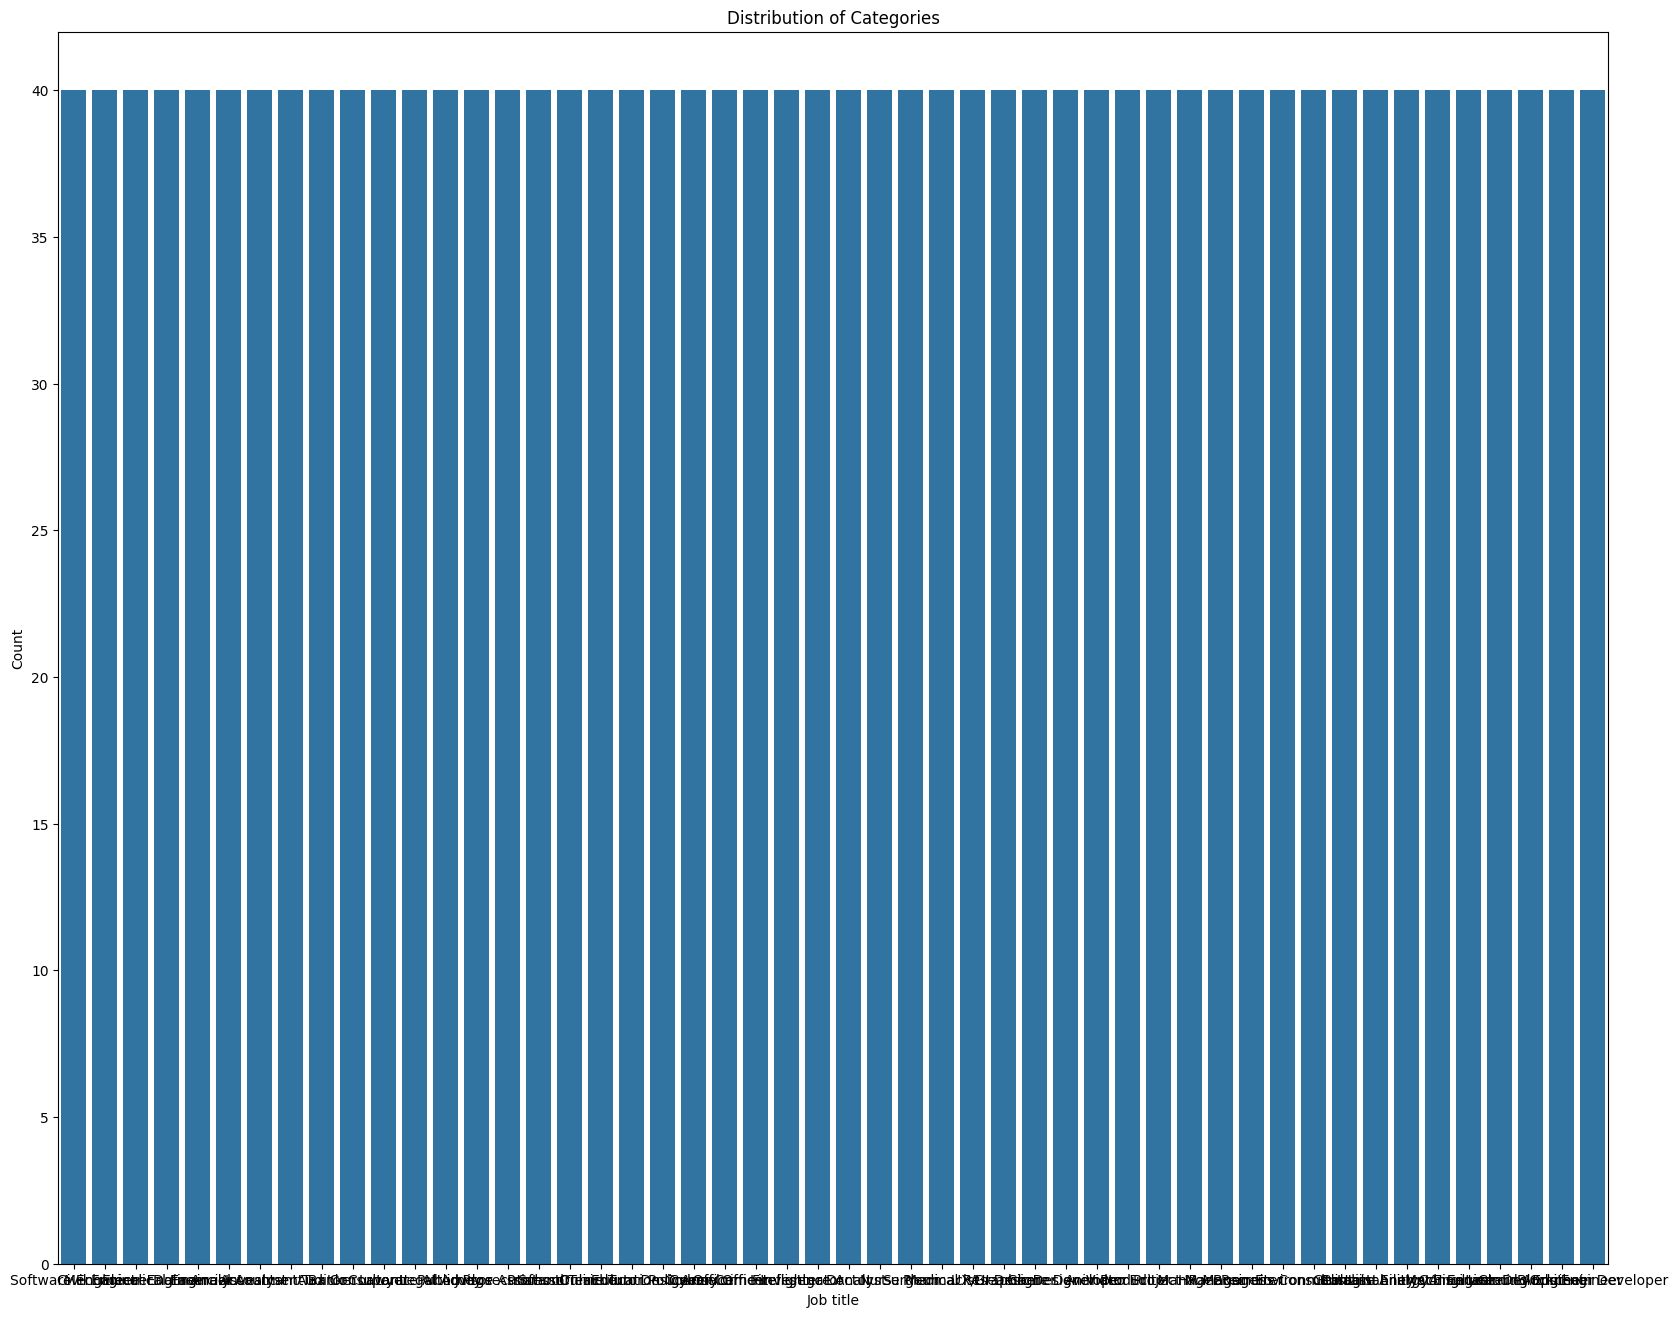

In [4]:
plt.figure(figsize=(20, 16))
sns.countplot(data=clean_df, x='job_category', order=clean_df['job_category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Job title')
plt.ylabel('Count')
plt.show()

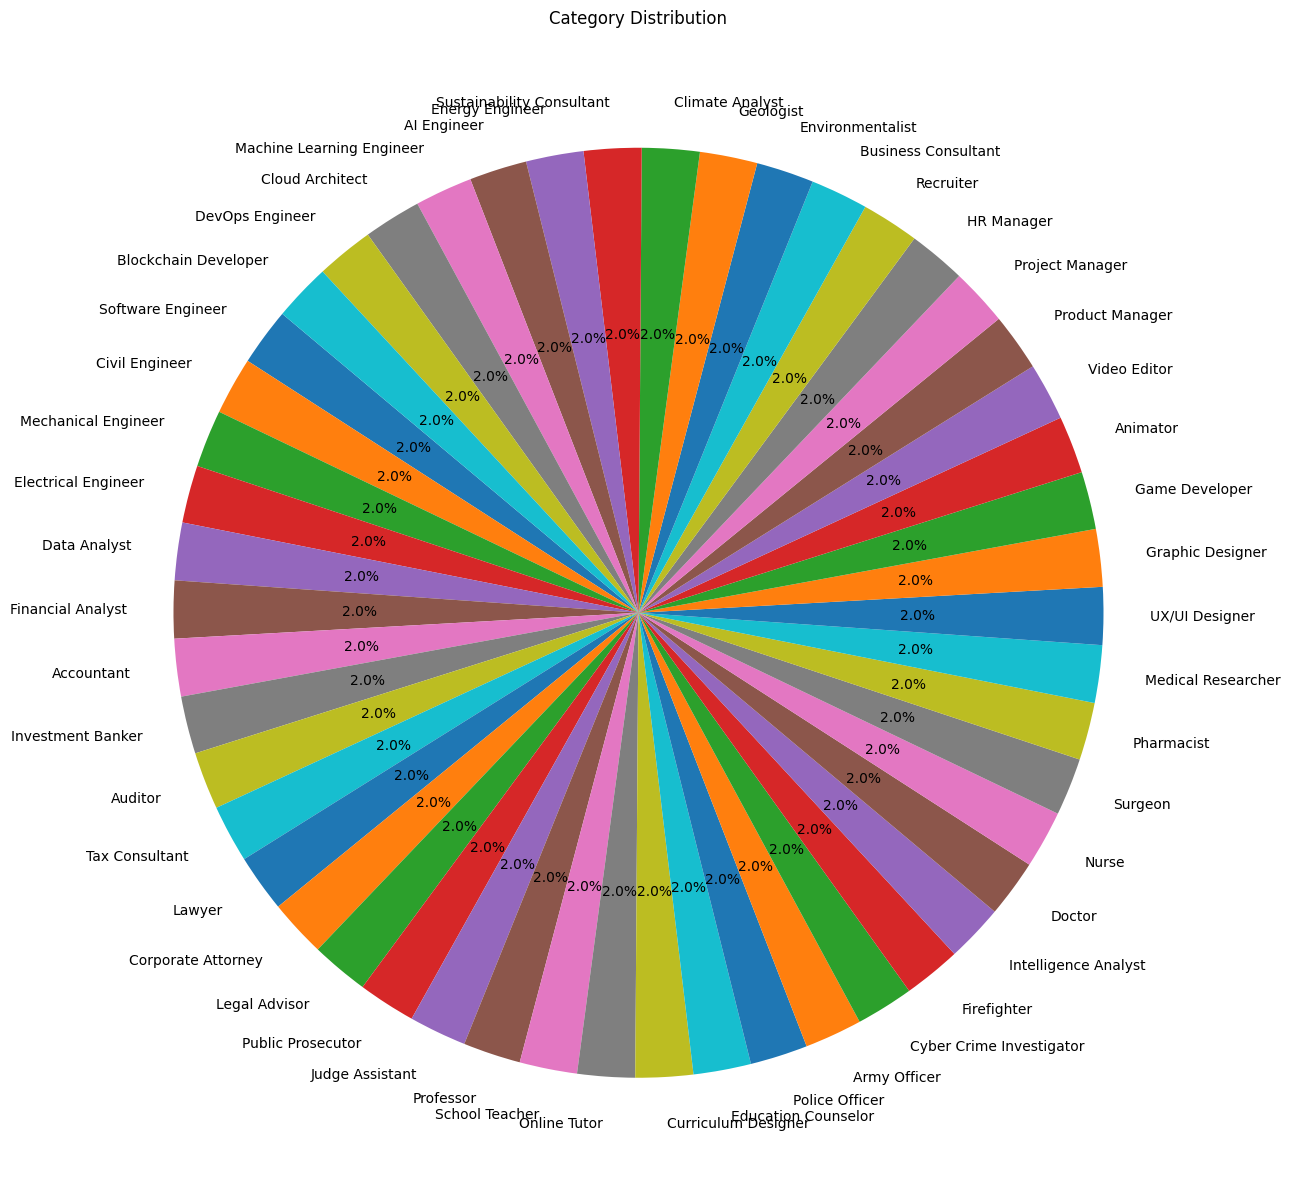

In [5]:
counts = clean_df['job_category'].value_counts()
labels = counts.index.tolist()
plt.figure(figsize=(15, 16))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.show()

In [6]:
from sklearn.utils import resample

max_count = clean_df['job_category'].value_counts().max()

balanced_data = []
for category in clean_df['job_category'].unique():
    category_data = clean_df[clean_df['job_category'] == category]
    if len(category_data) < max_count:
        # Upsample minority class
        balanced_category_data = resample(category_data, 
                                  replace=True, 
                                  n_samples=max_count, 
                                  random_state=42)
       
    else:
        balanced_category_data = resample(category_data, 
                                  replace=False, 
                                  n_samples=max_count, 
                                  random_state=42)

        balanced_data.append(balanced_category_data)

balanced_df = pd.concat(balanced_data, ignore_index=True)

In [7]:
print(balanced_df.columns)
balanced_df['job_category'].value_counts()


Index(['user_id', 'job_category', 'resume'], dtype='object')


job_category
Software Engineer            40
Civil Engineer               40
Mechanical Engineer          40
Electrical Engineer          40
Data Analyst                 40
Financial Analyst            40
Accountant                   40
Investment Banker            40
Auditor                      40
Tax Consultant               40
Lawyer                       40
Corporate Attorney           40
Legal Advisor                40
Public Prosecutor            40
Judge Assistant              40
Professor                    40
School Teacher               40
Online Tutor                 40
Curriculum Designer          40
Education Counselor          40
Police Officer               40
Army Officer                 40
Cyber Crime Investigator     40
Firefighter                  40
Intelligence Analyst         40
Doctor                       40
Nurse                        40
Surgeon                      40
Pharmacist                   40
Medical Researcher           40
UX/UI Designer             

train split


In [8]:
x = balanced_df['resume']
y = balanced_df['job_category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Encoding(tf-idf)

In [9]:
tfidf_vectorizer = CountVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

train random forest classifier

Accuracy: 100.00%
                           precision    recall  f1-score   support

              AI Engineer       1.00      1.00      1.00        10
               Accountant       1.00      1.00      1.00         8
                 Animator       1.00      1.00      1.00         6
             Army Officer       1.00      1.00      1.00         5
                  Auditor       1.00      1.00      1.00        10
     Blockchain Developer       1.00      1.00      1.00         7
      Business Consultant       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00        13
          Climate Analyst       1.00      1.00      1.00         8
          Cloud Architect       1.00      1.00      1.00         9
       Corporate Attorney       1.00      1.00      1.00         7
      Curriculum Designer       1.00      1.00      1.00         8
 Cyber Crime Investigator       1.00      1.00      1.00         9
             Data Analyst       1.00      1

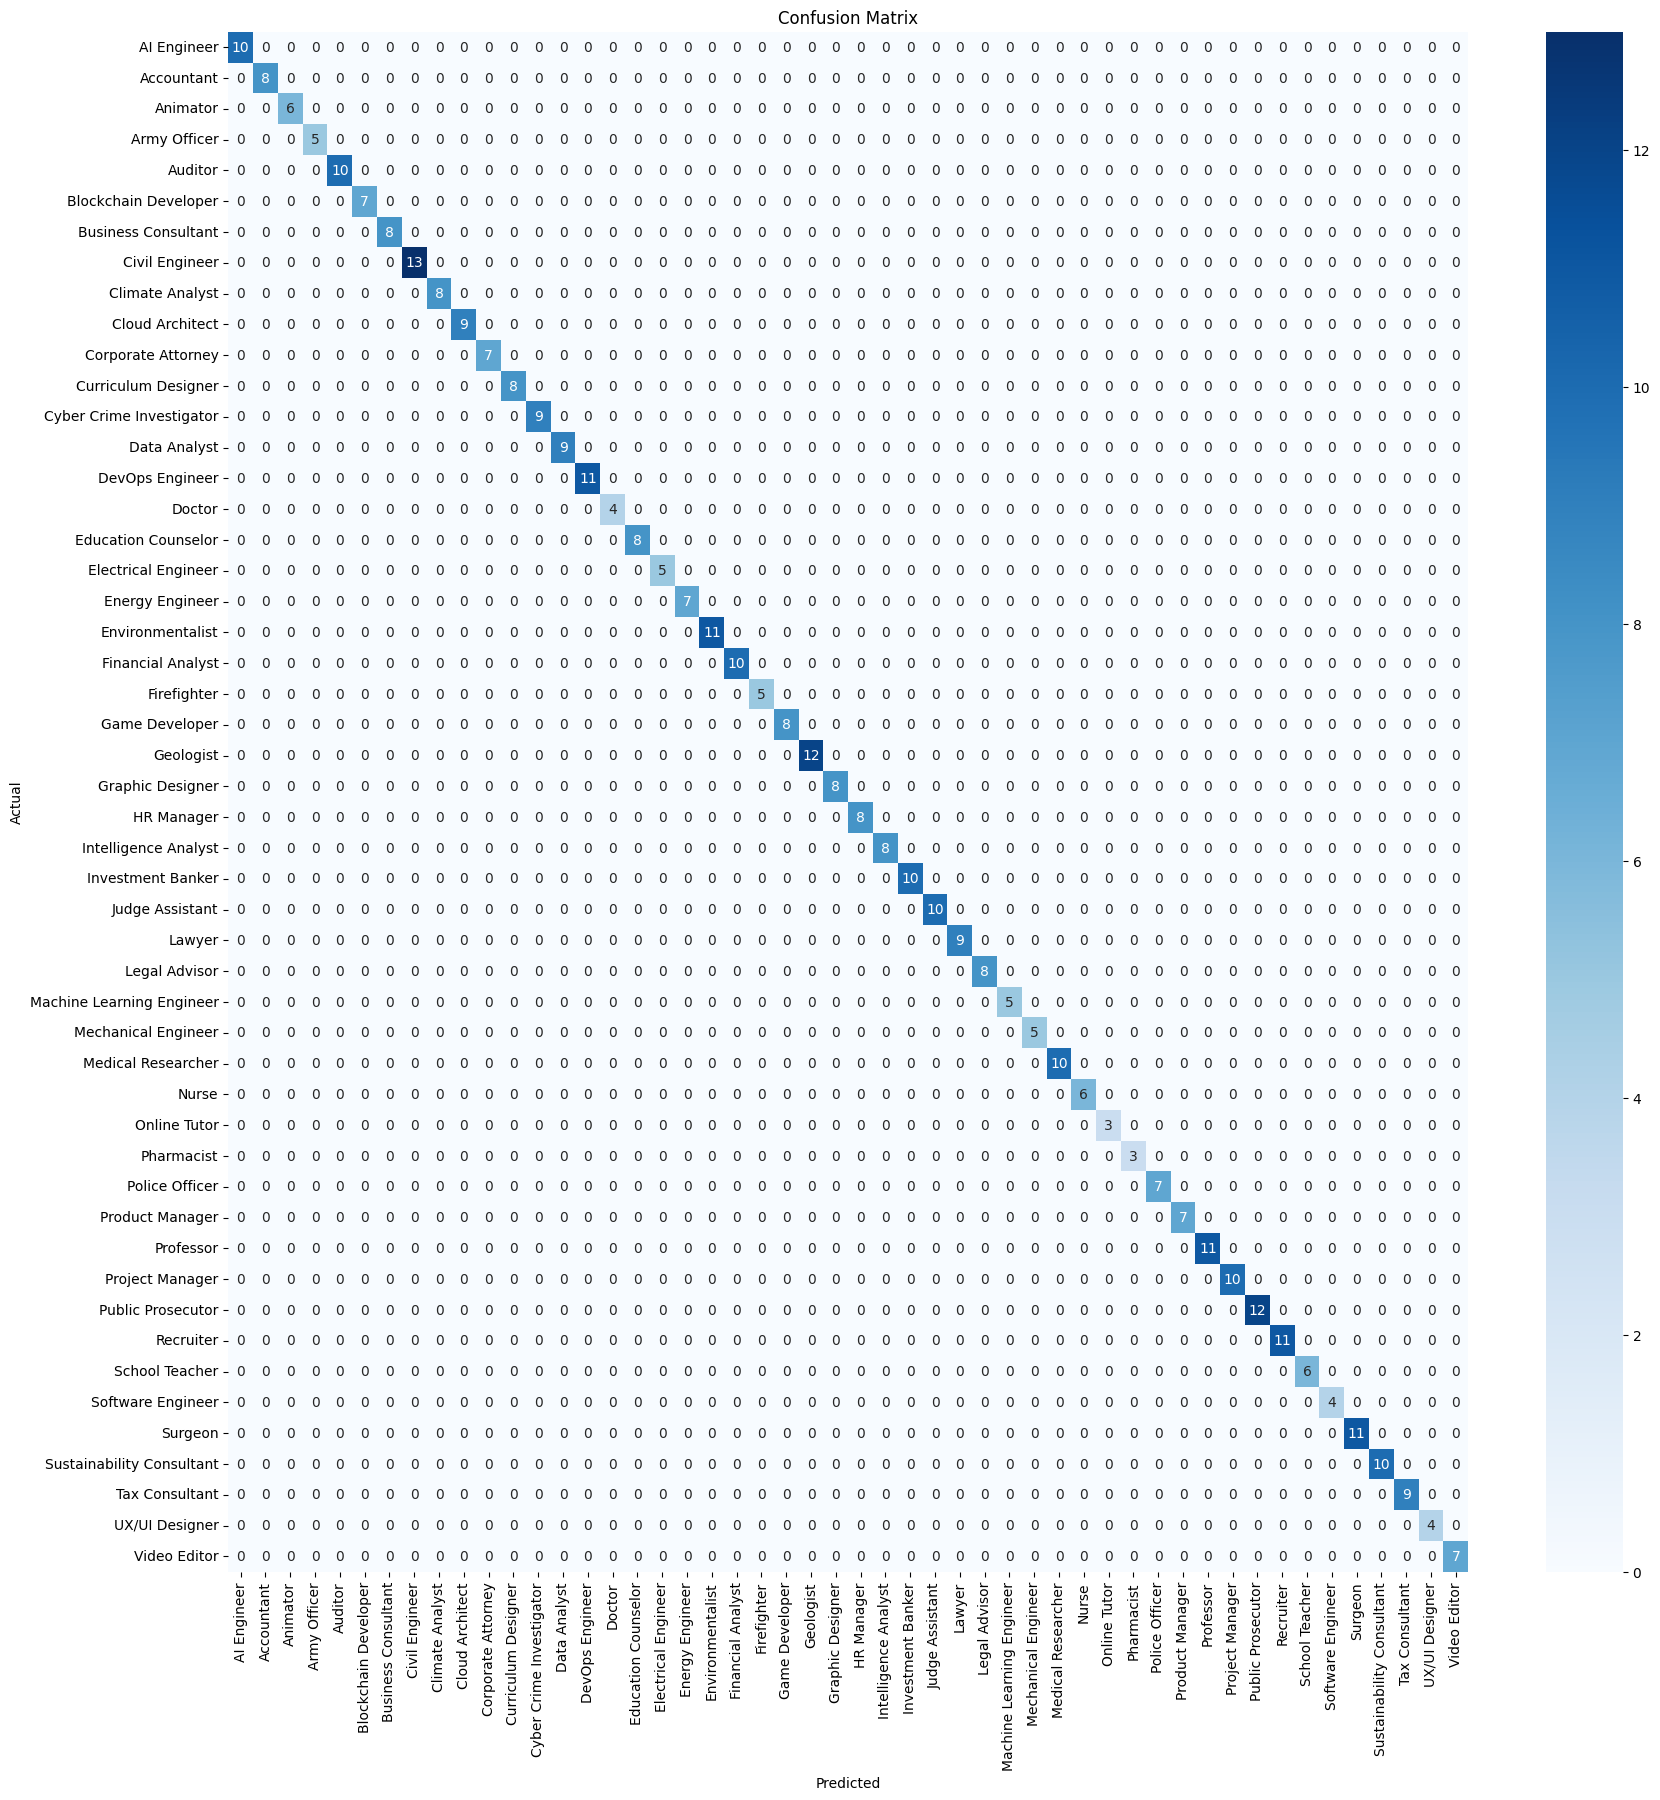

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_tfidf, y_train)

#accuracy evaluation 

y_pred = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

#confusion matrix

conft_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(conft_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predictive system 

In [11]:

import re 
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits

    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

def predicted_category(resume_text):
    resume_text = resume_text.lower()
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)
    return predicted_category[0]

In [12]:
resume_file = "Creative strategist with 6+ years leading branding campaigns for tech startups and e-commerce platforms. Skilled in Adobe Creative Suite, user research, and UI/UX prototyping using Figma. Worked closely with data analysts and frontend developers to A/B test landing pages and improve conversion rates. Recently completed a certification in product management and currently mentoring design interns. Looking for opportunities where creativity, data, and user empathy intersect."
predicted_category = predicted_category(resume_file)
print(f"The predicted category for the resume is: {predicted_category}")

The predicted category for the resume is: UX/UI Designer


save files 

In [13]:
import pickle
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(rf_classifier, open('rf_classifier.pkl', 'wb'))
# Save the balanced DataFrame

# Save the model and vectorizer
